# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

# First DataSet PISA:

PISA stands for "Program for International Student Assessment" and it is applied to 15 year-old students across the world to assess their performance in Math, Reading and Science. These are the 2015 scores.

Link to the data set
https://www.kaggle.com/zazueta/pisa-scores-2015/downloads/Pisa%20mean%20performance%20scores%202013%20-%202015%20Definition%20and%20Source.csv




In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


In [159]:
df = pd.read_csv('PISAData.csv', nrows=1161)
df=df[['Country Name','Series Name','2015 [YR2015]']]
df.columns=['Country','Series','Score_2015']
df['Score_2015'][df['Score_2015']=='..']=np.NaN
df['Score_2015']=df['Score_2015'].astype(float)

df=df.pivot_table(index=['Country'],columns=['Series'],values=['Score_2015'])
l0=df.columns.get_level_values(0)
l1=df.columns.get_level_values(1)
names=[x[1] if x[1] else x[0] for x in zip (l0,l1)]
#df.columns=names
names2=['mathematics','mathematics_Female','mathematics_Male','reading','reading_Female','reading_Male','science','science_Female','science_Male']
df.columns=names2

df.reset_index()
df=df.dropna()

### the 9 metrixes are extremelly correlate.

In [121]:
df.corr()

,mathematics,mathematics_Female,mathematics_Male,reading,reading_Female,reading_Male,science,science_Female,science_Male
mathematics,1.000000,0.996050,0.996220,0.944694,0.938286,0.936269,0.975159,0.968043,0.969146
mathematics_Female,0.996050,1.000000,0.984587,0.934626,0.937750,0.917764,0.969118,0.971142,0.954710
mathematics_Male,0.996220,0.984587,1.000000,0.946920,0.931268,0.946808,0.973600,0.957648,0.975821
reading,0.944694,0.934626,0.946920,1.000000,0.990635,0.992314,0.963816,0.948941,0.965100
reading_Female,0.938286,0.937750,0.931268,0.990635,1.000000,0.966321,0.956005,0.955596,0.944049
reading_Male,0.936269,0.917764,0.946808,0.992314,0.966321,1.000000,0.956038,0.928381,0.969292
science,0.975159,0.969118,0.973600,0.963816,0.956005,0.956038,1.000000,0.992877,0.993877
science_Female,0.968043,0.971142,0.957648,0.948941,0.955596,0.928381,0.992877,1.000000,0.973654
science_Male,0.969146,0.954710,0.975821,0.965100,0.944049,0.969292,0.993877,0.973654,1.000000


### Created two new features
#### PISA_average_country Average of the 3 subjects
#### Delta Male-Female/PISA_average_country

In [160]:
df['PISA_average_country']=(df['mathematics']+df['reading']+df['science'])/3.0
df['Delta Male-Female']=df['mathematics_Male']-df['mathematics_Female']+df['reading_Male']-df['reading_Female']+df['science_Male']-df['science_Female']
df=df[['PISA_average_country','Delta Male-Female']]
df.head()

,PISA_average_country,Delta Male-Female
Country,,
Albania,415.213600,-92.570316
Algeria,361.736867,-51.785809
Argentina,422.187533,17.061451
Australia,502.263567,-23.776820
Austria,492.215133,25.580473


<IPython.core.display.Javascript object>


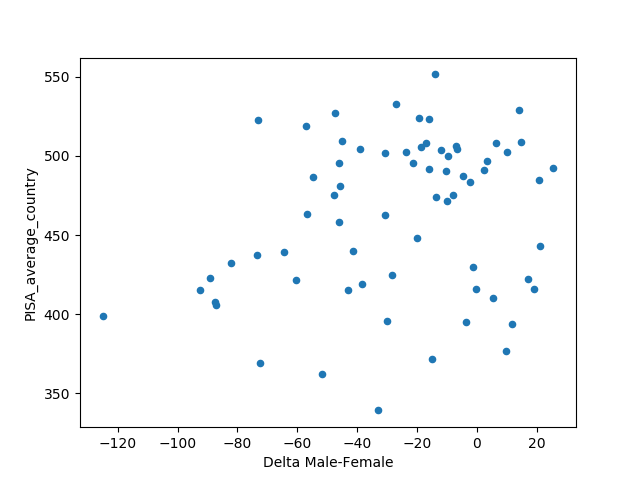

In [161]:
#df['assoluto']=np.abs(df['Delta Male-Female'])
df.plot.scatter('Delta Male-Female','PISA_average_country')


<IPython.core.display.Javascript object>


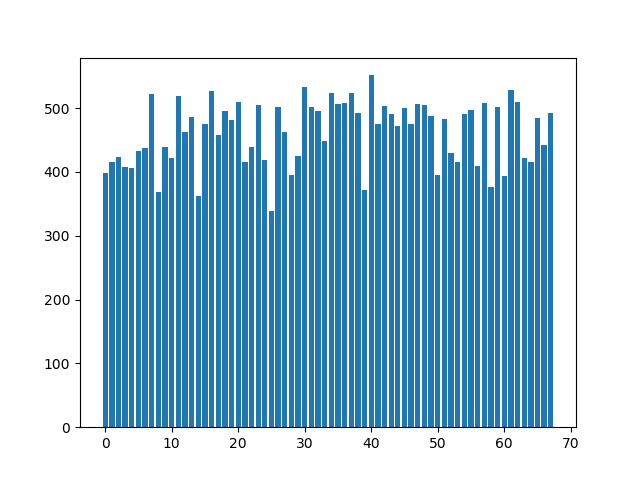

In [166]:
df.sort_values('Delta Male-Female',inplace=True)
plt.figure()

plt.bar(range(len(df.index)), df['PISA_average_country'])
plt.show()

# World Development Indicators importing

In [ ]:
IT.NET.USER.P2     [2014] --> Internet users (per 100 people)
NY.ADJ.NNTY.PC.CD  [2013]-->  Adjusted net national income per capita (current USdollar)
NY.GDP.PCAP.CD     [2013]-->  GDP per capita (current USdollar) 
SE.ADT.LITR.FE.ZS  [2014] --> Adult literacy rate, population 15+ years, female (%)
SE.ADT.LITR.MA.ZS  [2014] --> Adult literacy rate, population 15+ years, male (%)
SE.ADT.LITR.ZS     [2014] --> Adult literacy rate, population 15+ years, both sexes (%)
SE.XPD.CTOT.ZS     [2014] --> Current education expenditure, total (% of total expenditure in public institutions)
SG.VAW.REFU.ZS     [2014] --> Women who believe a husband is justified in beating his wife when she refuses sex with him (%)
SG.VAW.BURN.ZS     [2014] --> Women who believe a husband is justified in beating his wife when she burns the food (%)
SP.DYN.IMRT.FE.IN  [2015] --> Mortality rate, infant, female (per 1,000 live births)
SP.DYN.IMRT.IN     [2015] --> Mortality rate, infant (per 1,000 live births)
SP.DYN.IMRT.MA.IN  [2015] --> Mortality rate, infant, male (per 1,000 live births)

In [228]:
WordInds = pd.read_csv('Indicators.csv')#, nrows=1601)
WordInds=WordInds[['CountryName','IndicatorCode','Year','Value']]
#Filter for the most recent years...
WordInds=WordInds[WordInds['Year']>2012]

#Select the indicators of interest
indicators=['IT.NET.USER.P2','NY.ADJ.NNTY.PC.CD','NY.GDP.PCAP.CD',
'SE.ADT.LITR.ZS','SG.VAW.REFU.ZS',
'SP.DYN.IMRT.IN']

WordInds=WordInds[WordInds['IndicatorCode'].isin(indicators)]

In [229]:
WordInds=WordInds.pivot_table(index=['CountryName'],columns=['IndicatorCode'],values=['Value'])


colonne=['InternetUsers','IncomePerCapita','GDPPerCapita','AdultLiteracyRate','WomenWhoBelieve','MortalityInfant']
WordInds.columns=colonne
WordInds.head()

,InternetUsers,IncomePerCapita,GDPPerCapita,AdultLiteracyRate,WomenWhoBelieve,MortalityInfant
CountryName,,,,,,
Afghanistan,6.145,597.934626,650.182149,NaN,NaN,68.100000
Albania,58.650,3768.681933,4487.824290,NaN,NaN,12.900000
Algeria,17.295,4053.470579,5487.840610,NaN,NaN,22.000000
Andorra,94.950,NaN,42806.522553,NaN,NaN,2.133333
Angola,20.180,2940.322306,5900.529570,70.778412,NaN,98.733333


In [231]:
WordInds.corr()

,InternetUsers,IncomePerCapita,GDPPerCapita,AdultLiteracyRate,WomenWhoBelieve,MortalityInfant
InternetUsers,1.000000,0.798751,0.762588,0.690469,-0.451182,-0.796245
IncomePerCapita,0.798751,1.000000,0.978852,0.427427,-0.604312,-0.565410
GDPPerCapita,0.762588,0.978852,1.000000,0.361137,-0.592262,-0.527797
AdultLiteracyRate,0.690469,0.427427,0.361137,1.000000,-0.835945,-0.708537
WomenWhoBelieve,-0.451182,-0.604312,-0.592262,-0.835945,1.000000,0.508105
MortalityInfant,-0.796245,-0.565410,-0.527797,-0.708537,0.508105,1.000000


TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'